In [1]:
#imports
from scipy.spatial import distance_matrix
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio
import imageio
import random
from time import time
from tqdm import tqdm

In [2]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa200.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob200.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)

In [3]:
#plotting functions
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance 

In [4]:
# 1st variable - Start cycle - with random assignments
def start_cycle_random(dataset_choice="kroa"):
    cycles={}
    cycles[0]=np.random.choice(200,100,replace=False)
    cycles[1]=np.array([i for i in np.arange(0,200,1) if i not in cycles[0]])
    np.random.shuffle(cycles[1])
    return cycles


In [5]:
# 3rd variable - Generate neighbour solution
#changes edges internally
def change_edges(cycles, edge1, edge2, internally=False): # dummy internally
    cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
#     print(cycles[cI])
    inA=np.where(cycles[cI] == edge1)[0][0]
    inB=np.where(cycles[cI] == edge2)[0][0]
    inA += 1
    inB += 1
    cycle = cycles[cI]
    cycle[inA: inB] = np.flip(cycle[inA: inB])
    return cycles

In [6]:
# 3rd variable - Generate neighbour solution
#changes vertex internally or externaly between cycles
def change_vertices(cycles, a, b, internally=True):
    if internally:
#         print(len(np.where(cycles[0] == a)))
#         print(np.where(cycles[0] == a))
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI][inB]=tmp
        #print(cycles[0][inB], cycles[0][inA])
    else:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        cI2 = 1-cI
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI2] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI2][inB]=tmp
        #pass
    #print(cycles)
    return cycles
    #if aIndex in cycles[0]
    #raise NotImplementedError

In [7]:
# # 1st variable - Start cycle - with nearest neighbour method
# def start_cycle_heuristic(dataset_choice="kroa"):
#     results=[]
#     min_result=np.inf
#     max_result=0
#     if dataset_choice=="kroa":
#         dataset=np_kroa
#         dic=kroa
#         dist=copy.deepcopy(dista)
#         dist_stable=copy.deepcopy(dista)
#     else:
#         dataset=np_krob
#         dic=krob
#         dist=copy.deepcopy(distb)
#         dist_stable=copy.deepcopy(distb)


#     #zmiana dystansu przekątnej na nieskonczonosc
#     np.fill_diagonal(dist, np.inf)

#     cycles={}
#     cycles[0]=[randrange(200)]
#     cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

#     for b in range(2):
#         dist[:,int(cycles[b][0])]=np.inf

#     chosenCycle=1
#     for i in range(0,198):
#         chosenCycle = int((chosenCycle + 1)%2)
#         candidates=[]
#         for z,index in enumerate(cycles[chosenCycle]):
#             candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
#         candidates=np.array(candidates)
#         x=np.argmin(candidates[:,1])
#         cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
#         dist[:,int(candidates[x,0])]=np.inf
    
#     #print(f"cycle[0]: {calcDistance(cycles[0], dist_stable)}")
#     #print(f"cycle[1]: {calcDistance(cycles[1], dist_stable)}")
    
#     #SAVING RESULTS 
#     results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
#     if results[-1]>max_result:
#         max_result=results[-1]
#     if results[-1]<min_result:
#         min_result=results[-1]
# #         plt.clf()
# #         plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
# #         plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
# #         plt.savefig(f'best_NN_{dataset_choice}.png')
#     return cycles

In [8]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def greedy_search(dist, np_dots, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    done = False
    while not done:
        done = True
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        

        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
                #print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                done = False
                break
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance
    

In [18]:
K = 3 # docelowo 10
N = 10 # docelowo 100







  0%|          | 0/10 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray






 10%|█         | 1/10 [00:12<01:56, 12.89s/it]





 20%|██        | 2/10 [00:25<01:41, 12.68s/it]





 30%|███       | 3/10 [00:41<01:36, 13.73s/it]





 40%|████      | 4/10 [00:53<01:19, 13.23s/it]





 50%|█████     | 5/10 [01:06<01:06, 13.26s/it]





 60%|██████    | 6/10 [01:17<00:50, 12.63s/it]





 70%|███████   | 7/10 [01:30<00:37, 12.55s/it]





 80%|████████  | 8/10 [01:43<00:25, 12.81s/it]





 90%|█████████ | 9/10 [01:55<00:12, 12.62s/it]





100%|██████████| 10/10 [02:07<00:00, 12.78s/it]






  0%|          | 0/10 [00:00<?, ?it/s]





 10%|█         | 1/10 [00:16<02:25, 16.16s/it]





greedy_search- time_mean:133.01845407485962,  time_min:127.75986909866333, time_max:143.41325783729553, min:25660.556826582153, max:26598.22315963106, mean:26199.155921629415


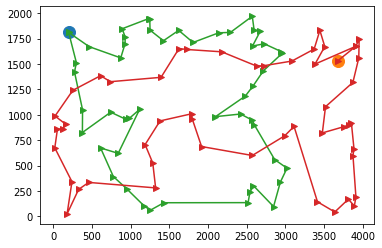







  0%|          | 0/10 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray






 10%|█         | 1/10 [00:11<01:40, 11.12s/it]





 20%|██        | 2/10 [00:22<01:29, 11.22s/it]





 30%|███       | 3/10 [00:34<01:20, 11.46s/it]





 40%|████      | 4/10 [00:48<01:12, 12.15s/it]





 50%|█████     | 5/10 [01:02<01:04, 12.89s/it]





 60%|██████    | 6/10 [01:18<00:54, 13.60s/it]





 70%|███████   | 7/10 [01:29<00:38, 12.93s/it]





 80%|████████  | 8/10 [01:41<00:25, 12.53s/it]





 90%|█████████ | 9/10 [01:51<00:11, 11.96s/it]





100%|██████████| 10/10 [02:03<00:00, 12.35s/it]






  0%|          | 0/10 [00:00<?, ?it/s]





 10%|█         | 1/10 [00:13<01:58, 13.12s/it]





greedy_search- time_mean:124.02873373031616,  time_min:115.29235339164734, time_max:133.3088219165802, min:26397.0621789, max:27183.448689635024, mean:26878.600490049157


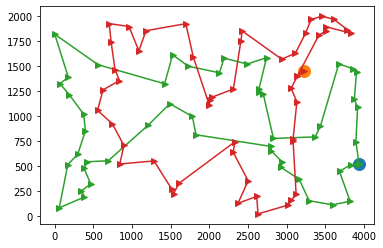

<Figure size 432x288 with 0 Axes>

In [69]:
#MAIN - tu poskladac wyzej zaimplementowane funkcje w 8 roznych kombinacji algorytmow i sprawdzic ich czasy i wyplotowac skutecznosci


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    timeTable = []
    cyclesTable = []
    distanceTable = []
    for _ in range(K):
        
        distanceTableBuffer = []
        cyclesTableBuffer = []
        bestDistance = 0
        startTime = time()
        for _ in tqdm(range(N)):

            cycles, bestDistance = greedy_search(dist, dataset, init_random = True, switch="change_edges")
            distanceTableBuffer.append(bestDistance)
            cyclesTableBuffer.append(cycles)
        timeTable.append(time() - startTime)
        distanceTable.append(np.min(distanceTableBuffer))
        cyclesTable.append( cyclesTableBuffer[np.argmin(distanceTableBuffer) ] )
    
    print(f"greedy_search- time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.show()
    
    plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')


In [ ]:
#greedy_search- time_mean:133.01845407485962,  time_min:127.75986909866333, time_max:143.41325783729553, 
# min:25660.556826582153, max:26598.22315963106, mean:26199.155921629415

#greedy_search- time_mean:124.02873373031616,  time_min:115.29235339164734, time_max:133.3088219165802, 
# min:26397.0621789, max:27183.448689635024, mean:26878.600490049157

##  (ILS1) Iterated local search - Iteracyjne przeszukiwanie lokalne z niewielką perturbacją,

In [12]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def ILS1(dist, np_dots, init_random = True, switch="change_edges", durationSec=10, shakeIt=3):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    startTime = time()
    bestBestDist = np.inf
    while True:
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        
        bestPossible = True
        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
#                 print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                bestPossible = False
                break
        
        if not bestPossible:
            continue
        
        
        
#         plotResult(np_dots, cycles)
        
        
        
        if bestDistance < bestBestDist:
            bestBestDist = bestDistance
            bestCycles = copy.deepcopy(cycles)
            print(f"BestDist: {bestDistance} is better than previous, so remember cycles")
        else:
            cycles = copy.deepcopy(bestCycles)
            print(f"BestDist: {bestDistance} is worst than previous so swap cycles")
        
        if time() - startTime > durationSec:
            break
        
        # Shake it
        
        for _ in range(shakeIt):
            possible_moves = []

            mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["external", x])

            mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
            mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["internal", x])

            possible_moves = np.array(possible_moves)
            i = np.random.choice(range(len(possible_moves)),1,replace=False)
            possible_moves = possible_moves[i]
            
            for move, edges in possible_moves:
                edge1 = edges[0]
                edge2 = edges[1]

#                 print(edge1, edge2)
                if move == "internal":
                    cycles = internal_change(cycles, edge1, edge2, internally=True)
                else:
                    cycles = change_vertices(cycles, edge1, edge2, False)
    
#         plotResult(np_dots, cycles)
        bestDistance = 0
        bestDistance += calcDistance(cycles[0], dist)
        bestDistance += calcDistance(cycles[1], dist)
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return bestCycles, bestBestDist

  0%|          | 0/5 [00:00<?, ?it/s]/home/mikolaj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 40940.75546969441 is better than previous, so remember cycles


/home/mikolaj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 39235.946202857245 is better than previous, so remember cycles
BestDist: 38167.83183357083 is better than previous, so remember cycles
BestDist: 38167.83183357083 is worst than previous so swap cycles
BestDist: 38123.28980510893 is better than previous, so remember cycles
BestDist: 37639.11664618779 is better than previous, so remember cycles
BestDist: 38325.41666281891 is worst than previous so swap cycles
BestDist: 36706.46919233304 is better than previous, so remember cycles
BestDist: 36809.47231830873 is worst than previous so swap cycles
BestDist: 37259.982100765556 is worst than previous so swap cycles
BestDist: 37249.25559625172 is worst than previous so swap cycles
BestDist: 37469.02063571238 is worst than previous so swap cycles
BestDist: 36780.76750404088 is worst than previous so swap cycles
BestDist: 37483.9997887638 is worst than previous so swap cycles
BestDist: 36706.46919233304 is worst than previous so swap cycles
BestDist: 36865.88340091011 is worst than pre

 20%|██        | 1/5 [11:44<46:59, 704.91s/it]

BestDist: 35714.97468649149 is worst than previous so swap cycles
BestDist: 39528.83107060338 is better than previous, so remember cycles
BestDist: 39329.98480133891 is better than previous, so remember cycles
BestDist: 39329.98480133891 is worst than previous so swap cycles
BestDist: 38776.792258152374 is better than previous, so remember cycles
BestDist: 40019.584975123274 is worst than previous so swap cycles
BestDist: 38609.91090243292 is better than previous, so remember cycles
BestDist: 38429.215252002876 is better than previous, so remember cycles
BestDist: 38477.56509495605 is worst than previous so swap cycles
BestDist: 39377.212291256474 is worst than previous so swap cycles
BestDist: 38733.90769841052 is worst than previous so swap cycles
BestDist: 37776.63321313208 is better than previous, so remember cycles
BestDist: 37816.31631824351 is worst than previous so swap cycles
BestDist: 38619.21090294511 is worst than previous so swap cycles
BestDist: 37938.18873195459 is worst

 40%|████      | 2/5 [23:44<35:41, 713.80s/it]

BestDist: 36334.5312675797 is better than previous, so remember cycles
BestDist: 38697.44460814996 is better than previous, so remember cycles
BestDist: 38764.572567772666 is worst than previous so swap cycles
BestDist: 38449.020597872935 is better than previous, so remember cycles
BestDist: 38855.75226937946 is worst than previous so swap cycles
BestDist: 39160.43539388529 is worst than previous so swap cycles
BestDist: 38473.83889280082 is worst than previous so swap cycles
BestDist: 38084.491974772915 is better than previous, so remember cycles
BestDist: 38685.3410592662 is worst than previous so swap cycles
BestDist: 38825.265510678684 is worst than previous so swap cycles
BestDist: 37749.13841734194 is better than previous, so remember cycles
BestDist: 37676.78423803394 is better than previous, so remember cycles
BestDist: 38200.218106989196 is worst than previous so swap cycles
BestDist: 37626.74077778612 is better than previous, so remember cycles
BestDist: 37523.488975708286 is

 60%|██████    | 3/5 [35:50<23:58, 719.25s/it]

BestDist: 36878.16362747022 is worst than previous so swap cycles
BestDist: 37885.9384547209 is better than previous, so remember cycles
BestDist: 37786.3995726164 is better than previous, so remember cycles
BestDist: 37596.46625820603 is better than previous, so remember cycles
BestDist: 37624.58693158133 is worst than previous so swap cycles
BestDist: 36808.12610040535 is better than previous, so remember cycles
BestDist: 36999.917054330755 is worst than previous so swap cycles
BestDist: 36867.56634743343 is worst than previous so swap cycles
BestDist: 37060.30852941323 is worst than previous so swap cycles
BestDist: 36382.41989425314 is better than previous, so remember cycles
BestDist: 36785.66774112504 is worst than previous so swap cycles
BestDist: 37801.04287354563 is worst than previous so swap cycles
BestDist: 38181.38536633902 is worst than previous so swap cycles
BestDist: 37294.18606742394 is worst than previous so swap cycles
BestDist: 37340.82335505735 is worst than previ

 80%|████████  | 4/5 [47:48<11:58, 718.70s/it]

BestDist: 35316.421124788474 is better than previous, so remember cycles
BestDist: 39453.98968858349 is better than previous, so remember cycles
BestDist: 39519.78328297619 is worst than previous so swap cycles
BestDist: 37772.97793171009 is better than previous, so remember cycles
BestDist: 37797.14849147849 is worst than previous so swap cycles
BestDist: 37692.906635263775 is better than previous, so remember cycles
BestDist: 36733.04827260822 is better than previous, so remember cycles
BestDist: 36892.45619948203 is worst than previous so swap cycles
BestDist: 36588.19126482068 is better than previous, so remember cycles
BestDist: 36110.96269430429 is better than previous, so remember cycles
BestDist: 35698.003053482316 is better than previous, so remember cycles
BestDist: 36990.55818382124 is worst than previous so swap cycles
BestDist: 35758.36254822613 is worst than previous so swap cycles
BestDist: 35481.87038796216 is better than previous, so remember cycles
BestDist: 35585.433

100%|██████████| 5/5 [59:33<00:00, 714.67s/it]

BestDist: 34802.09420125066 is worst than previous so swap cycles
greedy_search- min:34802.09420125066, max:36878.16362747022, mean:35809.23698151611


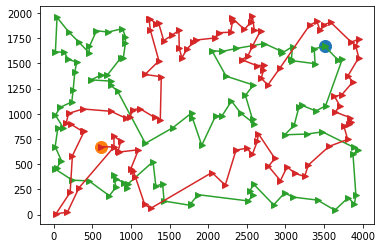

  0%|          | 0/5 [00:00<?, ?it/s]/home/mikolaj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 40785.09383901609 is better than previous, so remember cycles


/home/mikolaj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 38699.62708242682 is better than previous, so remember cycles
BestDist: 38665.22309586154 is better than previous, so remember cycles
BestDist: 38626.88982589371 is better than previous, so remember cycles
BestDist: 38626.88982589371 is worst than previous so swap cycles
BestDist: 38896.259529726325 is worst than previous so swap cycles
BestDist: 38801.591544719435 is worst than previous so swap cycles
BestDist: 38626.88982589371 is worst than previous so swap cycles
BestDist: 39511.2057559486 is worst than previous so swap cycles
BestDist: 38660.16341162154 is worst than previous so swap cycles
BestDist: 39417.10947130318 is worst than previous so swap cycles
BestDist: 38350.774788201685 is better than previous, so remember cycles
BestDist: 36942.213265661805 is better than previous, so remember cycles
BestDist: 37777.930128575645 is worst than previous so swap cycles
BestDist: 37324.00798037323 is worst than previous so swap cycles
BestDist: 37373.149050491615 is worst than

 20%|██        | 1/5 [12:05<48:22, 725.73s/it]

BestDist: 36498.27544067487 is better than previous, so remember cycles
BestDist: 38609.09235491278 is better than previous, so remember cycles
BestDist: 37884.283338059766 is better than previous, so remember cycles
BestDist: 37907.46287301084 is worst than previous so swap cycles
BestDist: 37874.553767989826 is better than previous, so remember cycles
BestDist: 39424.06392936973 is worst than previous so swap cycles
BestDist: 37372.584601487775 is better than previous, so remember cycles
BestDist: 37737.341317999046 is worst than previous so swap cycles
BestDist: 38456.611931118896 is worst than previous so swap cycles
BestDist: 36931.30941899074 is better than previous, so remember cycles
BestDist: 37191.617572743016 is worst than previous so swap cycles
BestDist: 38693.56044223021 is worst than previous so swap cycles
BestDist: 36773.407461672316 is better than previous, so remember cycles
BestDist: 37687.15126507364 is worst than previous so swap cycles
BestDist: 36607.80125634378

 40%|████      | 2/5 [24:13<36:20, 727.00s/it]

BestDist: 38032.88063976458 is worst than previous so swap cycles
BestDist: 38583.67330452254 is better than previous, so remember cycles
BestDist: 38398.729522132315 is better than previous, so remember cycles
BestDist: 38528.74446566985 is worst than previous so swap cycles
BestDist: 38451.07592196936 is worst than previous so swap cycles
BestDist: 38313.69390570317 is better than previous, so remember cycles
BestDist: 38313.69390570317 is worst than previous so swap cycles
BestDist: 38520.93130471366 is worst than previous so swap cycles
BestDist: 38236.63415901818 is better than previous, so remember cycles
BestDist: 37448.63196686517 is better than previous, so remember cycles
BestDist: 36995.656864800985 is better than previous, so remember cycles
BestDist: 37637.28647696909 is worst than previous so swap cycles
BestDist: 36779.35266153251 is better than previous, so remember cycles
BestDist: 37272.33865196772 is worst than previous so swap cycles
BestDist: 37135.24390762368 is w

 60%|██████    | 3/5 [36:10<24:04, 722.21s/it]

BestDist: 37149.07392119923 is worst than previous so swap cycles
BestDist: 38952.926878201455 is better than previous, so remember cycles
BestDist: 38377.82854104996 is better than previous, so remember cycles
BestDist: 37701.98193571425 is better than previous, so remember cycles
BestDist: 37821.16126238732 is worst than previous so swap cycles
BestDist: 36298.30021362706 is better than previous, so remember cycles
BestDist: 36550.91105630578 is worst than previous so swap cycles
BestDist: 36320.38051266398 is worst than previous so swap cycles
BestDist: 36998.24930335494 is worst than previous so swap cycles
BestDist: 36191.458363906204 is better than previous, so remember cycles
BestDist: 35162.86684978504 is better than previous, so remember cycles
BestDist: 35520.16061429414 is worst than previous so swap cycles
BestDist: 36365.197545905336 is worst than previous so swap cycles
BestDist: 35578.03281103977 is worst than previous so swap cycles
BestDist: 35162.86684978504 is worst 

 80%|████████  | 4/5 [47:52<11:54, 714.34s/it]

BestDist: 34486.50749747871 is better than previous, so remember cycles
BestDist: 38929.63583634946 is better than previous, so remember cycles
BestDist: 38929.63583634946 is worst than previous so swap cycles
BestDist: 37901.69175941784 is better than previous, so remember cycles
BestDist: 37485.9639024382 is better than previous, so remember cycles
BestDist: 37485.9639024382 is worst than previous so swap cycles
BestDist: 36905.47786504389 is better than previous, so remember cycles
BestDist: 36610.3255356941 is better than previous, so remember cycles
BestDist: 36630.418319356955 is worst than previous so swap cycles
BestDist: 37435.50154477781 is worst than previous so swap cycles
BestDist: 36933.923542843884 is worst than previous so swap cycles
BestDist: 36558.251067119316 is better than previous, so remember cycles
BestDist: 36106.12810545264 is better than previous, so remember cycles
BestDist: 35426.81866000898 is better than previous, so remember cycles
BestDist: 34279.448514

100%|██████████| 5/5 [59:34<00:00, 714.84s/it]

BestDist: 33800.092528509995 is worst than previous so swap cycles
greedy_search- min:33800.092528509995, max:38032.88063976458, mean:35993.36600552547


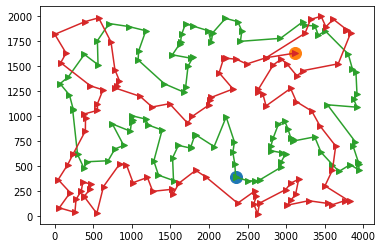

In [13]:
K = 5 # docelowo 10
durationSec = 700
for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    cyclesTable = []
    distanceTable = []
    for _ in tqdm(range(K)):
        cycles, bestDistance = ILS1(dist, dataset, init_random = True, switch="change_edges", durationSec=durationSec, shakeIt=3)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles )
    
    
    with open(f"greedy_search ils1_k5n20_{dataset_choice}.txt","w") as f:
        f.write(f"greedy_search ils1- min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    print(f"greedy_search- min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.savefig(f'greedy_search_ILS1_k5_n10_{dataset_choice}.png')
    plt.show()
    
    #plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')


## (ILS2) Iterated local search - Iteracyjne przeszukiwanie lokalne z Large-scale neighborhood search, tj. większą perturbacją typu Destroy-Repair.